# consistency checks for lpm annihilation simulation
Timothy Tyree<br>
3.29.2023

In [1]:
from lib.my_initialization import *

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
import subprocess

In [3]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

In [4]:
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


# define module

# consistency check for return_CollTime.c

In [6]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [26]:
!pwd

/Users/timothytyree/Documents/GitHub/bgmc/c/attractive


In [27]:
#compile the executable
os.system('./gcc.sh')

0

In [28]:
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2"
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 2 1 0 0 0 0 1 2"
# func_path = f"{cfolder}/return_CollTime.x"
# f"{func_path} {input_string}"
# # os.system(f"{func_path} {input_string}")
# # os.system(f"{func_path} {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# os.system(f"{func_path} <<< {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# # os.system(f"/return_CollTime.x < 1-control.input | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")

In [29]:
# N0_lst=list(range(2,100,4))
# N0_lst=list(range(2,100,8))
N0_lst=list(range(2,102,2))
# N0_lst

In [9]:
niter=1000
dt=1e-4
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
# seed=1
seed=0
task_lst=[]
# for N0 in range(2,100,2):
for N0 in N0_lst:
    input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} 2"
    call_string = f"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '{input_string}'"
    call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    task_lst.append(call_string)
print(f"{len(task_lst)=}")
call_string

len(task_lst)=50


"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 0 0 0 0 0 0 2' | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"

In [58]:
print(retval)

[0.131322, 0.0409117, 0.018264, 0.0110846, 0.00836416, 0.00576834, 0.00455071, 0.0036219, 0.00321197, 0.00262181, 0.00227703, 0.00205087, 0.0017143, 0.00162942, 0.00141236, 0.00130125, 0.00117286, 0.00104599, 0.00098967, 0.000942411, 0.000853312, 0.000790139, 0.000704972, 0.000685969, 0.000661937, 0.000608138, 0.000567319, 0.00054965, 0.000528019, 0.000500825, 0.000482402, 0.00045, 0.000438443, 0.000424393, 0.000403722, 0.000368, 0.00036871, 0.000349875, 0.000342246, 0.000324769, 0.000322267, 0.000290983, 0.000293666, 0.000265928, 0.000275278, 0.000270404, 0.00025546, 0.000247193, 0.000245141, 0.000239968]


In [59]:
def routine(call_string):
    return eval(subprocess.check_output(call_string, shell=True))

In [60]:
retval=[]
for call_string in task_lst:
    retval.append(routine(call_string))
len(retval)

50

In [61]:
# retval

In [62]:
# #run daskbag
# printing=True
# max_num_jobs=os.cpu_count()-1
# npartitions=np.min((len(task_lst),max_num_jobs))
# if printing:
#     print(f"running {len(task_lst)} tasks over {npartitions} cpu cores...")
# retval=eval_routine_daskbag(routine,task_lst,npartitions,printing=printing)
# if printing:
#     print(f"tasks complete!")

In [10]:
retval=[0.131322, 0.0409117, 0.018264, 0.0110846, 0.00836416, 0.00576834, 0.00455071, 0.0036219, 0.00321197, 0.00262181, 0.00227703, 0.00205087, 0.0017143, 0.00162942, 0.00141236, 0.00130125, 0.00117286, 0.00104599, 0.00098967, 0.000942411, 0.000853312, 0.000790139, 0.000704972, 0.000685969, 0.000661937, 0.000608138, 0.000567319, 0.00054965, 0.000528019, 0.000500825, 0.000482402, 0.00045, 0.000438443, 0.000424393, 0.000403722, 0.000368, 0.00036871, 0.000349875, 0.000342246, 0.000324769, 0.000322267, 0.000290983, 0.000293666, 0.000265928, 0.000275278, 0.000270404, 0.00025546, 0.000247193, 0.000245141, 0.000239968]

In [11]:
retval

[0.131322,
 0.0409117,
 0.018264,
 0.0110846,
 0.00836416,
 0.00576834,
 0.00455071,
 0.0036219,
 0.00321197,
 0.00262181,
 0.00227703,
 0.00205087,
 0.0017143,
 0.00162942,
 0.00141236,
 0.00130125,
 0.00117286,
 0.00104599,
 0.00098967,
 0.000942411,
 0.000853312,
 0.000790139,
 0.000704972,
 0.000685969,
 0.000661937,
 0.000608138,
 0.000567319,
 0.00054965,
 0.000528019,
 0.000500825,
 0.000482402,
 0.00045,
 0.000438443,
 0.000424393,
 0.000403722,
 0.000368,
 0.00036871,
 0.000349875,
 0.000342246,
 0.000324769,
 0.000322267,
 0.000290983,
 0.000293666,
 0.000265928,
 0.000275278,
 0.000270404,
 0.00025546,
 0.000247193,
 0.000245141,
 0.000239968]

In [12]:
A=L**2
q_lst=[]
w_lst=[]
Tavg_lst=[]
for N0,Tavg in zip(N0_lst,retval):
    rate = 1/Tavg
    w = rate/A
#     q = (N0+2)/A
    q = N0/A
    #record
    w_lst.append(w)
    q_lst.append(q)
    Tavg_lst.append(Tavg)

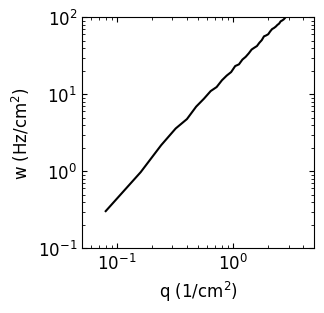

In [13]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst,color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [14]:
beep(4)

-n 
-n 
-n 
-n 


0

In [68]:
df_rates = pd.DataFrame(dict(
    N0=N0_lst,
    Tavg=Tavg_lst,
    q=q_lst,
    w=w_lst))
rate_dir = f"{nb_dir}/data/control_data/lpm_table1_lr_L_5.csv"
df_rates.to_csv(rate_dir,index=False)
rate_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_lr_L_5.csv'

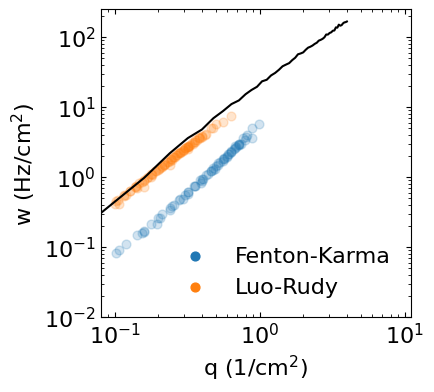

In [71]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [72]:
#13 minutes with 1000 perturbations and cross-validation of training per call to routine
# npartitions = np.max((1,os.cpu_count()-1))
# npartitions = np.min((npartitions,len(task_lst)))
# print(f"evaluating tasks (estimated run time 80 minutes)...")
# print(f"evaluating {len(task_lst)} calls to gener_tbins_fast over {npartitions} cpu cores...")

In [73]:
# with Pool(processes=(os.cpu_count() - 1)) as pool:
#     retval = list(pool.map(routine, task_lst))

In [74]:
# pd.read_csv ( '/Users/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.34.33.csv' )


In [75]:
# 10.147 - 2*0.4158

In [76]:
# task_str=f"{r:.5f} {D:.5f} {L} {kappa:.5f} {varkappa:.5f} {x0} {Dt} {dt} {Nmax} {niter} {reflect} {set_second} {no_repulsion} {no_attraction} {neighbor} {force_code}"


In [77]:
#DONE: replot Fig. 2B
#DONE: print its inputs
#DONE: use the function to generate its xy values
#DONE: overlay the xy values

# consistency check of return_CollTimes.c 
then, <br>
- TODO: call return_CollTimes.c
- TODO: check that I am able to reproduce one of WJ's curves
- TODO: use ^this to update xrun.sh

In [14]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
os.chdir(cfolder)
#compile the executable
os.system('./gcc.sh')
# !pwd

0

In [15]:
# niter=1500
# # niter=1000
# # niter=10
# dt=1e-3
# dt=1e-4
# # 0.155 0.42 5 300 9.3 1 0.001 0.001 150 1500 1 0 0 0 0 0 2
# # dt=1e-5
# L=5
# # L=10 
# D=0.42#0.4158
# alinear=9.3#9.3154
# neighbor=0
# r=0.155
# kappa=300
# seed=1
# # seed=0  #<<< what wj was using
# # seed=42
# # Nmax=50
# # Nmax=30
# # Nmax=15
# Nmax=100
# # Nmax=150
# # Nmax=200
# # Nmax=102
# # Nmax=1000

In [16]:
# niter=1500
niter=500
dt=1e-3
dt=1e-4
# 0.155 0.42 5 300 9.3 1 0.001 0.001 150 1500 1 0 0 0 0 0 2
# 0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2 #<<< WJ says this worked well
dt=1e-5
L=5
L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0

# r=0.155
# kappa=300
# r=0.135; kappa=60

kappa=100; r=0.125 #<<< WJ says this worked well for LR
# # kappa=50; r=0.125 # still too fast
# # kappa=10; r=0.125 # still too fast
# # kappa=100; r=0.125 #<<< WJ says this worked well for LR
# # kappa=100; r=0.06 # too fast
# # kappa=100; r=0.05 # too fast
# # kappa=100; r=0.035#too fast
# kappa=100; r=0.025 # # too fast
# # kappa=100; r=0.02 # 
# kappa=100; r=0.015 # too fast
# kappa=100; r=0.0125 # not bad
# # kappa=100; r=0.01 # too slow
# kappa=300; r=0.0125 # not bad


# seed=1
seed=0  #<<< what wj was using
Nmax=100
Nmax=150
alpha=2.
# alpha=1.5


x0=alpha

In [17]:
input_string = f"{r} {D} {L} {kappa} {alinear} {x0} {dt} {dt} {Nmax} {niter} {seed} 0 0 0 0 {neighbor} 2"
call_string = f"{cfolder}/return_CollTimes.x <<< '{input_string}'"
call_string

"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c/return_CollTimes.x <<< '0.125 0.42 10 100 9.3 2.0 1e-05 1e-05 150 500 0 0 0 0 0 0 2'"

In [18]:
os.system(call_string)
#24 seconds from 150 all the way down
# 52.2s from 100 all the way down
# 130s from 150 all the way down
# 40 seconds when N --> N-2 only when reactions occur
# ≥5 minutes when recounting only when reactions occur

Enter the reaction range (cm): r=0.125
Enter the diffusion coefficient (cm^2/s): D=0.42
Enter the domain width/height (cm): L=10
Enter the reaction rate (Hz): kappa=100
Enter the spring rate (Hz): varkappa=9.3
Enter the unpreferred distance (cm): x0=2
Enter the timestep of motion: Dt=1e-05
Enter the timestep of reaction: dt=1e-05
Enter the number of tips to observe: N=150
Enter the number of trials: niter=500
Enter the randomization seed: seed=0
Use reflecting boundary conditions? (Enter 1/0): reflect=0
Set second particle within reaction range of first? (Enter 1/0): set_second=0
Do not allow repulsive forces? (Enter 1/0): no_repulsion=0
Do not allow attractive forces? (Enter 1/0): no_attraction=0
Only allow nearest neighbor forces? (Enter 1/0): neighbor=0
Which force model should be used?
(Enter 1:spring, 2:QED2, 3:QED3, 4:QED2 + const. repulsion, 5:QED3 + const. repulsion, else:no force): force_code=2
the repeatable inputs are:
0.125 0.42 10 100 9.3 2 1e-05 1e-05 150 500 0 0 0 0 0 0 

0

2

running simulation...
simulation complete!

Printing Inputs...
r=0.125
D=0.42
L=10
kappa=100
varkappa=9.3
x0=2
dt=1e-05
Dt=1e-05
niter=500
reflect=0
set_second=0
no_repulsion=0
no_attraction=0
neighbor=0
force_code=2
iter_per_movestep=1

Printing Outputs...
150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
0.000838,0.000601,0.000443,0.000414,0.000372,0.000340,0.000332,0.000342,0.000300,0.000320,0.000290,0.000285,0.000290,0.000301,0.000290,0.000296,0.000284,0.000320,0.000298,0.000304,0.000313,0.000304,0.000300,0.000309,0.000340,0.000302,0.000345,0.000352,0.000354,0.000332,0.000363,0.000374,0.000382,0.000388,0.000460,0.000444,0.000426,0.000487,0.000436,0.000461,0.000513,0.000538,0.000543,0.000589,0.000582,0.000638,0.000696,0.000703,0.000749,0.000842,0.000839,0.000946,0.000931,0.001028,0.001

In [19]:
beep(3)


106,0.001320,0.001328,0.001462,0.001694,0.001832,0.002212,0.002355,0.002673,0.003064,0.003434,0.004207,0.004640,0.006306,0.008316,0.011319,0.016372,0.024985,0.050414,0.112430,0.435084,
-n 
-n 
-n 


0

In [22]:
beep(3)


-n 
-n 
-n 


0

In [42]:
# 1000,0,0,0,5,169,807,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,
# 1000,0,0,0,2,98,535,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,

In [43]:
# L=5
# L=10

In [26]:
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# 0.000000,0.001200,0.012500,0.021200,0.017100,0.016200,0.016700,0.014900,0.015100,0.014900,0.014500,0.013300,0.012700,0.012700,0.012800,0.013500,0.012500,0.013200,0.013000,0.011300,0.011800,0.012100,0.011800,0.012700,0.012200,0.012000,0.011700,0.011700,0.013500,0.011200,0.013300,0.013100,0.013500,0.014000,0.014600,0.014100,0.014900,0.014600,0.017400,0.019200,0.019100,0.020700,0.026300,0.031200,0.039100,0.055900,0.096300,0.238200,
dout = pd.DataFrame({'N':[
150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,
#modified lpm, unshifted  #L=5
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
],
              'CollTime':[
0.0,0.0,9.052504526252265e-09,1.4898688915375448e-08,3.653444676409186e-08,1.0438413361169103e-07,2.709069493521791e-07,3.4591194968553466e-07,1.937984496124031e-06,6.6666666666666675e-06,1.1764705882352944e-05,3.181818181818182e-05,2.1000000000000002e-05,2.6e-05,3.5e-05,5.5000000000000036e-05,2.0000000000000005e-05,3.5e-05,3.199999999999999e-05,4.4000000000000026e-05,3.3e-05,5.3e-05,3.9000000000000026e-05,3.200000000000002e-05,5.2e-05,3.499999999999996e-05,3.400000000000005e-05,3.600000000000002e-05,5.900000000000001e-05,5.099999999999998e-05,5.6999999999999996e-05,5.100000000000003e-05,4.699999999999997e-05,0.00010499999999999998,7.600000000000004e-05,7.9e-05,0.0001,6.4e-05,5.4999999999999995e-05,5.399999999999999e-05,0.0001530000000000001,6.000000000000003e-05,0.00012800000000000002,0.0001040000000000001,0.0001309999999999999,0.00022700000000000015,0.00010799999999999994,0.00017000000000000015,0.000154,0.00011199999999999994,0.00014100000000000012,0.00019500000000000016,0.00020899999999999985,0.0001439999999999999,0.00022900000000000025,0.00036399999999999985,0.0003300000000000001,0.00021200000000000003,0.0005100000000000003,0.000582,0.0004830000000000001,0.0005509999999999997,0.0006719999999999999,0.0011230000000000003,0.0009860000000000003,0.0005719999999999996,0.0014750000000000006,0.0016990000000000002,0.0014609999999999996,0.002081,0.00363,0.009317000000000002,0.010111,0.038411,0.088993,
#fk
# 0.0,4.4247787610619474e-07,1.2499999999999999e-05,8.8e-06,0.00013600000000000005,0.00027333333333333333,0.00039333333333333337,0.00010666666666666673,6.999999999999997e-05,0.0003866666666666667,0.00016333333333333317,0.0003966666666666667,4.33333333333333e-05,0.0002600000000000001,0.0007066666666666667,0.0003166666666666665,0.00014999999999999996,0.000346666666666667,0.00037999999999999986,0.0002599999999999998,5.0000000000000273e-05,0.0003266666666666667,0.00041666666666666615,0.00010666666666666695,0.00022999999999999987,0.00048666666666666677,0.0004099999999999995,0.0002133333333333333,0.000346666666666667,0.0005966666666666672,0.00038666666666666596,0.0005500000000000001,0.00036999999999999994,0.0006600000000000003,0.0008566666666666665,0.0004933333333333335,0.0007200000000000007,0.00018333333333333222,0.001040000000000001,0.001563333333333334,0.0011066666666666666,0.0017399999999999996,0.0011133333333333331,0.0008233333333333344,0.0009833333333333337,0.002099999999999999,0.0020499999999999984,0.0018000000000000006,0.0018133333333333324,0.0038966666666666663,0.0011200000000000006,0.000770000000000001,0.004829999999999998,0.005326666666666666,0.0014499999999999988,0.0043900000000000015,0.004153333333333333,0.007973333333333337,0.0058966666666666655,0.0028033333333333335,0.006783333333333338,0.006736666666666664,0.018533333333333332,0.03684666666666667,0.02512333333333332,0.013876666666666676,0.03557000000000001,0.006894999999999998,0.09949500000000003,0.025334999999999996,0.02013000000000001,
# 0.0,7.1900826446281e-06,1.466666666666667e-05,3.9999999999999996e-05,9.000000000000002e-05,0.00016000000000000004,3.0000000000000024e-05,0.00019999999999999998,2.999999999999997e-05,0.00048,0.00010000000000000005,0.00026000000000000003,0.00014499999999999995,0.00013999999999999993,0.000245,0.00010000000000000005,0.00047999999999999996,0.000245,0.00049,0.000925,0.00101,3.000000000000008e-05,0.0005449999999999999,0.00011000000000000029,0.0003849999999999995,0.0004050000000000004,0.0003600000000000001,0.0002599999999999998,0.00036500000000000074,0.0001849999999999994,0.0002149999999999999,0.0004750000000000006,0.00034,0.0003499999999999996,0.001235,0.0008350000000000007,0.0009299999999999994,0.0014600000000000012,0.0009399999999999981,0.0013450000000000007,0.0009399999999999999,0.0007749999999999996,0.0002500000000000002,0.00098,0.0012250000000000004,0.0008900000000000002,0.0016150000000000001,0.0031200000000000012,0.0007649999999999983,0.006065000000000001,0.000845000000000002,0.0009449999999999979,0.004965000000000001,0.007960000000000002,0.011999999999999997,0.0028350000000000077,0.000729999999999998,0.005419999999999998,0.010270000000000008,0.008320000000000001,0.006019999999999991,0.0011999999999999997,0.010890000000000004,0.021489999999999995,0.014810000000000004,0.014975000000000016,0.023925000000000002,0.02511999999999999,0.08560000000000001,0.15424,0.13139,
#lr
# 0.000838,0.000601,0.000443,0.000414,0.000372,0.000340,0.000332,0.000342,0.000300,0.000320,0.000290,0.000285,0.000290,0.000301,0.000290,0.000296,0.000284,0.000320,0.000298,0.000304,0.000313,0.000304,0.000300,0.000309,0.000340,0.000302,0.000345,0.000352,0.000354,0.000332,0.000363,0.000374,0.000382,0.000388,0.000460,0.000444,0.000426,0.000487,0.000436,0.000461,0.000513,0.000538,0.000543,0.000589,0.000582,0.000638,0.000696,0.000703,0.000749,0.000842,0.000839,0.000946,0.000931,0.001028,0.001106,0.001320,0.001328,0.001462,0.001694,0.001832,0.002212,0.002355,0.002673,0.003064,0.003434,0.004207,0.004640,0.006306,0.008316,0.011319,0.016372,0.024985,0.050414,0.112430,0.435084,
# 0.0,1.1799410029498526e-07,3.0208333333333338e-06,3.6e-06,1.2000000000000005e-05,0.00010333333333333333,5.3333333333333326e-05,5e-05,5.666666666666664e-05,0.00019000000000000004,0.0001,0.00016333333333333326,0.00010000000000000005,9.999999999999998e-05,8.333333333333326e-05,0.00016666666666666682,3.333333333333335e-05,4.666666666666672e-05,6.666666666666663e-05,0.00019666666666666674,0.0002566666666666666,0.00012000000000000003,3.9999999999999814e-05,0.00017000000000000015,0.00033666666666666654,0.00021333333333333347,0.00043666666666666664,0.00016333333333333317,0.00023333333333333366,5.9999999999999866e-05,0.00015333333333333315,0.00020666666666666663,9.333333333333357e-05,0.0002999999999999999,0.00037666666666666637,0.0002133333333333336,0.00023666666666666684,0.00019333333333333325,0.00037333333333333343,0.0006666666666666664,0.00015000000000000026,0.00010333333333333346,0.00012333333333333293,0.0004866666666666671,0.00038333333333333275,0.00024000000000000006,0.0007666666666666672,0.0002566666666666666,0.0009166666666666669,0.0008033333333333335,0.0007433333333333332,0.0009533333333333338,0.000773333333333333,0.0007599999999999997,0.0002999999999999999,0.0009466666666666686,0.00028666666666666657,0.0018466666666666655,0.001126666666666667,0.00026333333333333303,0.004463333333333334,0.0017799999999999992,0.005033333333333334,0.0035400000000000015,0.0011033333333333336,0.005156666666666666,0.003960000000000001,0.0064199999999999995,0.012976666666666671,0.009939999999999996,0.014253333333333331,0.024293333333333333,0.05718000000000001,0.06654000000000002,0.07801999999999998,
# 2.2435897435897438e-07,2.0472440944881893e-06,2.7948717948717943e-05,2.9444444444444448e-05,0.00010454545454545456,0.00010363636363636361,7.000000000000001e-05,8.727272727272727e-05,7.090909090909089e-05,7.636363636363635e-05,5.363636363636363e-05,0.00013000000000000002,0.00010272727272727269,0.00013272727272727272,0.00010090909090909096,0.00013545454545454543,0.00012454545454545463,0.00016727272727272733,0.00014545454545454546,0.00021545454545454542,0.00012181818181818187,0.00021,0.0001863636363636363,0.0001827272727272725,0.0001972727272727272,0.00015000000000000007,0.00010090909090909105,0.00027272727272727263,0.00019181818181818186,0.00021909090909090907,0.0004118181818181819,0.00020909090909090918,0.0001672727272727271,0.00036,0.00027000000000000006,0.0002827272727272732,0.00018545454545454548,0.0005863636363636364,0.00024999999999999957,0.00026000000000000003,0.0003309090909090909,0.00026818181818181823,0.0004445454545454546,0.00036363636363636356,0.0005472727272727277,0.0006690909090909092,0.0002663636363636366,0.00030181818181818196,0.0004363636363636361,0.0007154545454545453,0.0006881818181818187,0.0010381818181818183,0.0014081818181818186,0.0009100000000000001,0.0008300000000000004,0.0004854545454545452,0.0011763636363636364,0.0012972727272727276,0.0011645454545454543,0.0021936363636363633,0.001910000000000001,0.001517272727272728,0.002937272727272729,0.0032145454545454556,0.003100000000000001,0.00583909090909091,0.006353636363636364,0.00725454545454545,0.007793636363636366,0.011346363636363637,0.018995000000000005,
# 7.692307692307693e-07,4.285714285714286e-06,4.25e-05,3.6875e-05,7.90909090909091e-05,7.181818181818179e-05,9.363636363636365e-05,0.00011181818181818184,6.636363636363638e-05,6.18181818181818e-05,6.272727272727277e-05,6.545454545454542e-05,9.181818181818186e-05,0.00012181818181818183,0.00012000000000000004,0.00013454545454545457,0.0001518181818181818,0.0001663636363636364,7.27272727272727e-05,0.0001863636363636363,0.00020636363636363647,0.00011636363636363632,0.00014181818181818176,0.00015818181818181816,0.00021181818181818186,0.00022363636363636376,0.00019000000000000004,0.00023090909090909084,0.00015454545454545454,0.0003263636363636365,0.00023545454545454545,0.00019181818181818162,0.00018818181818181835,0.0002818181818181817,0.0002700000000000001,0.0002709999999999997,0.00024300000000000008,0.0003479999999999999,0.00044100000000000026,0.00035800000000000014,0.0005340000000000003,0.0005220000000000002,0.0005240000000000002,0.0002449999999999999,0.0003380000000000003,0.000566,0.0005430000000000001,0.00035899999999999994,0.0008330000000000001,0.000512,0.0004939999999999999,0.00045200000000000014,0.0010260000000000007,0.001193,0.0011350000000000002,0.001009,0.0017589999999999997,0.0013530000000000005,0.0015760000000000004,0.0015679999999999995,0.0019580000000000005,0.0032569999999999995,0.0024080000000000013,0.003034999999999999,0.003085000000000001,0.0030620000000000022,0.006499,0.009849000000000002,0.015600999999999999,0.013238000000000003,0.014303999999999994,
# 8.333333333333334e-07,5.492957746478873e-06,4.137931034482758e-05,3.941176470588237e-05,6.75e-05,6.666666666666666e-05,7.5e-05,7.500000000000001e-05,0.00012083333333333332,7.083333333333334e-05,6.666666666666666e-05,0.00017,0.00016083333333333328,0.00011500000000000007,0.00014000000000000001,9.83333333333333e-05,0.00011833333333333337,0.00012833333333333333,0.000135,0.0001641666666666667,0.0002075,0.00014833333333333335,0.00012666666666666672,0.00014666666666666666,0.0001791666666666667,0.0002625,0.00023833333333333345,0.0002399999999999999,0.0003016666666666667,0.00028000000000000003,0.00013416666666666668,0.0002708333333333334,0.0002333333333333333,0.0002675000000000001,0.00021499999999999983,0.0003608333333333334,0.00022583333333333318,0.0004558333333333334,0.00023333333333333352,0.0003,0.0004241666666666668,0.00029083333333333343,0.00038250000000000024,0.0004933333333333333,0.0002833333333333331,0.0005566666666666668,0.0003383333333333333,0.0006425000000000003,0.0007566666666666662,0.0003916666666666669,0.00048666666666666677,0.0006250000000000001,0.000949999999999999,0.0007533333333333333,0.0009958333333333334,0.0005883333333333331,0.0011725000000000006,0.0014141666666666662,0.0021375,0.0012941666666666668,0.0016816666666666672,0.0010291666666666663,0.002621666666666668,0.003334999999999999,0.003844166666666667,0.0051333333333333335,0.007096666666666668,0.0037175000000000016,0.011039166666666662,0.011024545454545459,0.01127272727272727,
# 0.0,2.23463687150838e-07,1.8831168831168835e-06,2.7200000000000002e-06,6.547619047619049e-06,1.2238805970149256e-05,1.813559322033899e-05,1.634615384615385e-05,1.8979591836734696e-05,1.8260869565217383e-05,2.0434782608695664e-05,3.326086956521741e-05,3.0217391304347827e-05,1.9130434782608697e-05,2.6956521739130422e-05,3.086956521739133e-05,3.0652173913043476e-05,3.67391304347826e-05,3.152173913043479e-05,3.543478260869566e-05,4.869565217391306e-05,3.9782608695652164e-05,3.434782608695653e-05,3.108695652173913e-05,3.47826086956522e-05,3.7826086956521756e-05,4.9130434782608685e-05,4.630434782608697e-05,4.6956521739130424e-05,5.76086956521739e-05,4.521739130434783e-05,6.0434782608695654e-05,7.478260869565218e-05,6.760869565217391e-05,4.8913043478260886e-05,7.173913043478263e-05,6.73913043478261e-05,8.1304347826087e-05,6.869565217391305e-05,7.999999999999998e-05,9.304347826086954e-05,8.413043478260867e-05,0.00010369565217391302,8.21739130434783e-05,0.00013826086956521735,0.0001282608695652174,9.652173913043477e-05,0.00010086956521739131,0.0001391304347826087,0.00012565217391304358,0.00016086956521739132,0.00017521739130434797,0.0001628260869565218,0.00027217391304347835,0.00026500000000000004,0.0002565217391304345,0.0002702173913043478,0.00030500000000000004,0.0004645652173913045,0.00045391304347826056,0.0005291304347826085,0.00044500000000000003,0.00046478260869565216,0.0007939130434782614,0.0008376086956521741,0.0008634782608695649,0.0010857777777777777,0.0014428888888888892,0.002463777777777778,0.002903555555555556,0.004331555555555555,
# 1.0101010101010101e-07,5.319148936170213e-07,2.2222222222222225e-06,6.666666666666668e-06,6.417910447761198e-06,1.610169491525424e-05,1.3571428571428572e-05,1.6862745098039215e-05,2.4897959183673473e-05,2.124999999999999e-05,2.916666666666667e-05,2.1666666666666677e-05,2.3750000000000008e-05,2.6041666666666658e-05,2.6250000000000004e-05,3.062500000000002e-05,2.5625000000000003e-05,2.8541666666666675e-05,3.020833333333335e-05,2.833333333333334e-05,2.5833333333333342e-05,2.8541666666666668e-05,2.7291666666666675e-05,3.708333333333333e-05,3.0416666666666693e-05,3.979166666666671e-05,3.6458333333333336e-05,3.749999999999997e-05,3.8958333333333316e-05,3.6041666666666684e-05,3.791666666666665e-05,3.3124999999999985e-05,4.333333333333334e-05,3.60416666666667e-05,4.104166666666669e-05,5.0208333333333366e-05,6.020833333333336e-05,4.270833333333335e-05,5.270833333333334e-05,5.8333333333333285e-05,7.187500000000005e-05,8.333333333333328e-05,8.041666666666667e-05,8.45833333333333e-05,9.22916666666667e-05,9.145833333333332e-05,0.00010395833333333344,0.00012395833333333334,9.833333333333341e-05,0.00010520833333333339,0.00014020833333333333,0.0001404166666666667,0.0002008333333333335,0.00017666666666666677,0.00019458333333333318,0.0002945833333333335,0.00018916666666666683,0.00028437499999999996,0.0003127083333333334,0.00039437500000000003,0.00039937500000000004,0.0003677083333333331,0.0006647916666666665,0.0006114583333333332,0.0008022916666666668,0.0007597916666666665,0.001188125,0.0010070833333333338,0.002089787234042552,0.0024487234042553183,0.005245106382978722,
#levy output
# 0.000427,0.000333,0.000247,0.000255,0.000211,0.000202,0.000174,0.000175,0.000168,0.000145,0.000162,0.000154,0.000141,0.000150,0.000140,0.000146,0.000131,0.000138,0.000129,0.000127,0.000130,0.000138,0.000127,0.000128,0.000134,0.000127,0.000134,0.000129,0.000138,0.000139,0.000142,0.000135,0.000143,0.000155,0.000156,0.000147,0.000156,0.000184,0.000179,0.000188,0.000193,0.000182,0.000194,0.000225,0.000208,0.000239,0.000269,0.000273,0.000265,0.000312,0.000302,0.000319,0.000363,0.000353,0.000396,0.000448,0.000529,0.000552,0.000569,0.000714,0.000787,0.000984,0.001038,0.001203,0.001478,0.001801,0.002279,0.003206,0.004321,0.005728,0.011228,0.018174,0.044376,0.123467,0.921926,
# 0.000427,0.000294,0.000234,0.000215,0.000201,0.000177,0.000153,0.000142,0.000146,0.000149,0.000136,0.000132,0.000129,0.000118,0.000125,0.000112,0.000122,0.000113,0.000119,0.000116,0.000115,0.000112,0.000118,0.000110,0.000110,0.000115,0.000119,0.000118,0.000129,0.000113,0.000118,0.000136,0.000120,0.000137,0.000136,0.000137,0.000133,0.000147,0.000143,0.000163,0.000173,0.000176,0.000171,0.000172,0.000187,0.000193,0.000216,0.000226,0.000243,0.000235,0.000257,0.000267,0.000276,0.000306,0.000364,0.000341,0.000359,0.000400,0.000445,0.000499,0.000541,0.000666,0.000723,0.000803,0.000927,0.001083,0.001174,0.001641,0.001998,0.002803,0.004034,0.005830,0.010539,0.022364,0.100778,
#modified lpm, unshifted  #L=5 fitted
# 0.135 0.42 5 60 9.3 1 1e-05 1e-05 150 500 0 0 0 0 0 0 2
# 0.000420,0.000298,0.000251,0.000194,0.000205,0.000170,0.000155,0.000147,0.000137,0.000136,0.000131,0.000135,0.000128,0.000126,0.000120,0.000120,0.000119,0.000115,0.000109,0.000122,0.000118,0.000112,0.000115,0.000117,0.000113,0.000114,0.000116,0.000125,0.000114,0.000114,0.000121,0.000129,0.000130,0.000126,0.000148,0.000140,0.000142,0.000137,0.000152,0.000153,0.000158,0.000157,0.000155,0.000178,0.000189,0.000177,0.000187,0.000210,0.000223,0.000230,0.000241,0.000239,0.000289,0.000302,0.000338,0.000341,0.000359,0.000400,0.000445,0.000499,0.000541,0.000666,0.000723,0.000803,0.000927,0.001083,0.001174,0.001641,0.001998,0.002803,0.004034,0.005830,0.010539,0.022364,0.100778,
#***# 0.0125 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.005706,0.003073,0.002218,0.001872,0.001550,0.001404,0.001244,0.001190,0.001119,0.001026,0.000976,0.000962,0.000942,0.000934,0.000868,0.000865,0.000831,0.000800,0.000813,0.000814,0.000788,0.000799,0.000782,0.000853,0.000859,0.000795,0.000839,0.000828,0.000888,0.000861,0.000881,0.000883,0.000884,0.000940,0.000970,0.001003,0.001061,0.001049,0.001046,0.001165,0.001172,0.001180,0.001164,0.001231,0.001307,0.001371,0.001383,0.001475,0.001544,0.001627,0.001747,0.001836,0.001926,0.002053,0.002200,0.002237,0.002434,0.002724,0.002953,0.003178,0.003590,0.004118,0.004288,0.004855,0.005920,0.006561,0.007902,0.009456,0.012053,0.014999,0.021998,0.034360,0.060003,0.145615,0.665230,
# 0.06 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.001693,0.000945,0.000743,0.000681,0.000590,0.000551,0.000505,0.000493,0.000463,0.000431,0.000429,0.000421,0.000420,0.000420,0.000405,0.000411,0.000375,0.000405,0.000400,0.000395,0.000390,0.000416,0.000406,0.000401,0.000430,0.000428,0.000419,0.000425,0.000446,0.000449,0.000463,0.000458,0.000467,0.000483,0.000519,0.000537,0.000538,0.000551,0.000583,0.000564,0.000606,0.000615,0.000647,0.000646,0.000690,0.000729,0.000768,0.000778,0.000865,0.000872,0.000958,0.001044,0.001069,0.001180,0.001241,0.001383,0.001474,0.001655,0.001703,0.001873,0.002186,0.002565,0.002798,0.003037,0.003662,0.004380,0.005041,0.006241,0.008160,0.010281,0.015087,0.023246,0.039923,0.094740,0.357153,
# 0.045 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.002035,0.001101,0.000894,0.000747,0.000688,0.000593,0.000586,0.000547,0.000531,0.000511,0.000486,0.000468,0.000477,0.000472,0.000473,0.000452,0.000451,0.000452,0.000420,0.000450,0.000434,0.000454,0.000434,0.000448,0.000450,0.000431,0.000464,0.000441,0.000464,0.000453,0.000496,0.000488,0.000495,0.000498,0.000535,0.000554,0.000537,0.000573,0.000570,0.000590,0.000594,0.000629,0.000648,0.000656,0.000671,0.000730,0.000747,0.000820,0.000813,0.000847,0.000950,0.001035,0.001113,0.001
# # # 0.035 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.002361,0.001288,0.001038,0.000884,0.000768,0.000703,0.000676,0.000632,0.000596,0.000563,0.000532,0.000562,0.000522,0.000503,0.000487,0.000506,0.000495,0.000480,0.000505,0.000463,0.000491,0.000465,0.000480,0.000474,0.000475,0.000493,0.000481,0.000490,0.000489,0.000497,0.000515,0.000491,0.000518,0.000535,0.000564,0.000530,0.000533,0.000574,0.000552,0.000612,0.000623,0.000625,0.000690,0.000685,0.000697,0.000736,0.000730,0.000777,0.000877,0.000856,0.000873,0.000954,0.001042,0.001099,0.001126,0.001264,0.001390,0.001508,0.001641,0.001715,0.001914,0.002096,0.002421,0.002707,0.003369,0.003890,0.004761,0.005829,0.007337,0.009912,0.014193,0.020560,0.036121,0.077886,0.338958
# 0.025 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.003119,0.001612,0.001243,0.001140,0.000961,0.000932,0.000833,0.000743,0.000731,0.000694,0.000662,0.000666,0.000613,0.000594,0.000606,0.000568,0.000574,0.000565,0.000537,0.000550,0.000551,0.000559,0.000519,0.000524,0.000534,0.000540,0.000536,0.000556,0.000543,0.000536,0.000547,0.000518,0.000604,0.000559,0.000592,0.000594,0.000580,0.000604,0.000650,0.000633,0.000629,0.000644,0.000669,0.000697,0.000725,0.000775,0.000760,0.000818,0.000800,0.000882,0.000907,0.000975,0.001019,0.001100,0.001134,0.001243,0.001252,0.001406,0.001572,0.001619,0.001832,0.001939,0.002282,0.002459,0.002819,0.003147,0.003876,0.004813,0.006513,0.008690,0.011287,0.017949,0.031376,0.071500,0.320327,
# # 0.02 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.003714,0.001959,0.001502,0.001307,0.001154,0.001043,0.000965,0.000894,0.000806,0.000782,0.000783,0.000733,0.000672,0.000695,0.000650,0.000653,0.000656,0.000640,0.000620,0.000611,0.000584,0.000578,0.000590,0.000583,0.000611,0.000610,0.000568,0.000603,0.000602,0.000607,0.000586,0.000611,0.000601,0.000631,0.000623,0.000627,0.000630,0.000631,0.000630,0.000676,0.000675,0.000709,0.000741,0.000744,0.000774,0.000793,0.000788,0.000853,0.000831,0.000893,0.000960,0.001005,0.001070,0.001109
# # 0.015 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.004784,0.002577,0.001916,0.001666,0.001371,0.001207,0.001078,0.001066,0.001003,0.000977,0.000891,0.000832,0.000834,0.000814,0.000756,0.000764,0.000742,0.000704,0.000753,0.000689,0.000682,0.000675,0.000656,0.000638,0.000686,0.000691,0.000673,0.000711,0.000695,0.000714,0.000741,0.000746,0.000735,0.000771,0.000793,0.000765,0.000810,0.000814,0.000841,0.000855,0.000883,0.000905,0.000914,0.000939,0.000995,0.000978,0.001064,0.001081,0.001170,0.001207,0.001256,0.001272,0.001434,0.001434,0.001582,0.001641,0.001806,0.001942,0.002217,0.002248,0.002376,0.002806,0.002945,0.003540,0.003862,0.004747,0.005576,0.006984,0.008425,0.011699,0.015101,0.023581,0.044139,0.111477,0.504563,
# # 0.0125 0.42 10 300 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.003168,0.001694,0.001374,0.001171,0.001052,0.000968,0.000874,0.000817,0.000774,0.000783,0.000722,0.000700,0.000685,0.000663,0.000661,0.000637,0.000594,0.000629,0.000583,0.000602,0.000577,0.000554,0.000601,0.000538,0.000571,0.000597,0.000584,0.000560,0.000559,0.000560,0.000568,0.000558,0.000605,0.000585,0.000576,0.000625,0.000624,0.000639,0.000652,0.000645,0.000661,0.000704,0.000763,0.000703,0.000723,0.000774,0.000791,0.000861,0.000847,0.000875,0.000931,0.000962,0.001033,0.001054,0.001110,0.001258,0.001338,0.001402,0.001436,0.001620,0.001762,0.002005,0.002161,0.002296,0.002652,0.003415,0.003864,0.004479,0.005770,0.007696,0.010806,0.016810,0.030059,0.070304,0.320597,
# # 0.01 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.006942,0.003625,0.002611,0.002141,0.001878,0.001672,0.001511,0.001330,0.001340,0.001255,0.001217,0.001128,0.001115,0.001088,0.001033,0.001009,0.001090,0.001041,0.001015,0.001065,0.001026,0.001090,0.001078,0.001079,0.001129,0.001171,0.001114,0.001218,0.001202,0.001213,0.001322,0.001293,0.001313,0.001400,0.001431,0.001467,0.001473,0.001478,0.001578,0.001641,0.001710,0.001809,0.001786,0.001870,0.001996,0.002070,0.002248,0.002287,0.002383,0.002613,0.002841,0.002789,0.003036,0.003135,0.003437,0.003753,0.003960,0.004261,0.004603,0.005015,0.005629,0.006125,0.006661,0.008152,0.008931,0.010507,0.012419,0.014213,0.017921,0.022939,0.032976,0.051208,0.096365,0.220311,1.029528,
# # 0.01 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.006942,0.003625,0.002611,0.002141,0.001878,0.001672,0.001511,0.001330,0.001340,0.001255,0.001217,0.001128,0.001115,0.001088,0.001033,0.001009,0.001090,0.001041,0.001015,0.001065,0.001026,0.001090,0.001078,0.001079,0.001129,0.001171,0.001114,0.001218,0.001202,0.001213,0.001322,0.001293,0.001313,0.001400,0.001431,0.001467,0.001473,0.001478,0.001578,0.001641,0.001710,0.001809,0.001786,0.001870,0.001996,0.002070,0.002248,0.002287,0.002383,0.002613,0.002841,0.002789,0.003036,0.003135,0.003437,0.003753,0.003960,0.004261,0.004603,0.005015,0.005629,0.006125,0.006661,0.008152,0.008931,0.010507,0.012419,0.014213,0.017921,0.022939,0.032976,0.051208,0.096365,0.220311,1.029528,
# # 0.05 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.001878,0.001065,0.000847,0.000715,0.000632,0.000589,0.000557,0.000515,0.000500,0.000480,0.000480,0.000484,0.000460,0.000426,0.000419,0.000423,0.000433,0.000430,0.000425,0.000403,0.000418,0.000424,0.000427,0.000428,0.000440,0.000416,0.000465,0.000448,0.000430,0.000446,0.000480,0.000478,0.000509,0.000515,0.000500,0.000553,0.000520,0.000553,0.000563,0.000562,0.000613,0.000618,0.000641,0.000667,0.000692,0.000737,0.000756,0.000806,0.000834,0.000875,0.000935,0.001017,0.001070,0.001103,0.001279,0.001408,0.001375,0.001531,0.001776,0.001945,0.002029,0.002297,0.002739,0.003059,0.003779,0.004129,0.005056,0.006102,0.008019,0.010336,0.014548,0.022292,0.038852,0.088089,0.351610,
# # 0.125 0.42 10 10 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.003744,0.002054,0.001491,0.001221,0.001004,0.000922,0.000817,0.000778,0.000670,0.000658,0.000613,0.000588,0.000575,0.000568,0.000567,0.000518,0.000526,0.000508,0.000503,0.000501,0.000496,0.000489,0.000486,0.000498,0.000498,0.000471,0.000494,0.000490,0.000466,0.000482,0.000501,0.000500,0.000532,0.000533,0.000529,0.000526,0.000568,0.000552,0.000559,0.000605,0.000614,0.000627,0.000651,0.000637,0.000716,0.000706,0.000722,0.000748,0.000806,0.000865,0.000921,0.000957,0.001047,0.001054,0.001093,0.001269,0.001285,0.001441,0.001659,0.001681,0.001981,0.002128,0.002434,0.002675,0.003219,0.003990,0.004627,0.005883,0.007495,0.010685,0.015491,0.025059,0.044468,0.098744,0.468774,
# 0.125 0.42 10 50 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.001534,0.000913,0.000747,0.000661,0.000590,0.000544,0.000511,0.000495,0.000463,0.000443,0.000434,0.000416,0.000401,0.000422,0.000400,0.000420,0.000405,0.000395,0.000411,0.000391,0.000420,0.000402,0.000407,0.000405,0.000415,0.000422,0.000431,0.000431,0.000440,0.000461,0.000461,0.000469,0.000477,0.000491,0.000517,0.000511,0.000523,0.000551,0.000549,0.000585,0.000607,0.000634,0.000673,0.000656,0.000696,0.000762,0.000741,0.000791,0.000876,0.000917,0.000976,0.001065,0.001051,0.001185,0.001287,0.001363,0.001543,0.001641,0.001764,0.002041,0.002289,0.002536,0.002759,0.003194,0.003777,0.004416,0.005321,0.006589,0.008215,0.011043,0.014560,0.023046,0.041880,0.095890,0.376469,
# # 0.125 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.001044,0.000658,0.000520,0.000478,0.000447,0.000396,0.000391,0.000364,0.000373,0.000339,0.000340,0.000345,0.000339,0.000327,0.000332,0.000342,0.000348,0.000323,0.000318,0.000334,0.000328,0.000341,0.000335,0.000342,0.000354,0.000369,0.000362,0.000363,0.000393,0.000375,0.000417,0.000430,0.000426,0.000434,0.000468,0.000464,0.000482,0.000481,0.000508,0.000570,0.000537,0.000562,0.000601,0.000614,0.000679,0.000663,0.000728,0.000789,0.000810,0.000882,0.000945,0.000960,0.001007,0.001112,0.001165,0.001320,0.001416,0.001635,0.001735,0.002025,0.002182,0.002327,0.002693,0.003224,0.003717,0.004145,0.005530,0.006482,0.008582,0.011304,0.015738,0.023937,0.044232,0.097956,0.384939,
# # # 0.125 0.42 5 100 9.3 1 0.0001 0.0001 100 1500 0 0 0 0 0 0 2
# 0.000708,0.000445,0.000385,0.000337,0.000293,0.000284,0.000279,0.000260,0.000251,0.000254,0.000237,0.000229,0.000234,0.000239,0.000228,0.000250,0.000247,0.000259,0.000248,0.000257,0.000263,0.000285,0.000291,0.000297,0.000308,0.000317,0.000338,0.000355,0.000367,0.000390,0.000413,0.000460,0.000484,0.000520,0.000595,0.000658,0.000733,0.000807,0.000908,0.001042,0.001219,0.001483,0.001902,0.002230,0.002933,0.004202,0.006141,0.011235,0.022239,0.091127,
# 0.000708,0.000445,0.000385,0.000337,0.000293,0.000284,0.000279,0.000260,0.000251,0.000254,0.000237,0.000229,0.000234,0.000239,0.000228,0.000250,0.000247,0.000259,0.000248,0.000257,0.000263,0.000285,0.000291,0.000297,0.000308,0.000317,0.000338,0.000355,0.000367,0.000390,0.000413,0.000460,0.000484,0.000520,0.000595,0.000658,0.000733,0.000807,0.000908,0.001042,0.001219,0.001483,0.001902,0.002230,0.002933,0.004202,0.006141,0.011235,0.022239,0.091127,
#modified lpm, unshifted  #L=5
# 0.000170,0.000097,0.000097,0.000085,0.000084,0.000079,0.000080,0.000082,0.000079,0.000074,0.000077,0.000076,0.000072,0.000079,0.000074,0.000077,0.000074,0.000078,0.000080,0.000084,0.000081,0.000082,0.000087,0.000082,0.000086,0.000088,0.000088,0.000089,0.000096,0.000096,0.000101,0.000103,0.000111,0.000108,0.000115,0.000115,0.000124,0.000125,0.000133,0.000135,0.000144,0.000145,0.000153,0.000157,0.000169,0.000182,0.000183,0.000196,0.000204,0.000221,0.000233,0.000257,0.000268,0.000300,0.000298,0.000332,0.000362,0.000390,0.000450,0.000474,0.000547,0.000632,0.000701,0.000785,0.000973,0.001094,0.001294,0.001655,0.002135,0.002800,0.004064,0.005841,0.010687,0.023159,0.083260,
# 0.001277,0.000381,0.000293,0.000181,0.000167,0.000180,0.000166,0.000146,0.000123,0.000105,0.000077,0.000086,0.000109,0.000119,0.000114,0.000097,0.000106,0.000091,0.000101,0.000091,0.000084,0.000074,0.000109,0.000105,0.000109,0.000113,0.000105,0.000116,0.000106,0.000092,0.000108,0.000109,0.000117,0.000122,0.000135,0.000134,0.000125,0.000156,0.000133,0.000151,0.000141,0.000167,0.000159,0.000165,0.000192,0.000174,0.000198,0.000215,0.000219,0.000197,0.000260,0.000255,0.000274,0.000289,0.000313,0.000331,0.000355,0.000394,0.000425,0.000480,0.000519,0.000574,0.000595,0.000656,0.000823,0.000889,0.001009,0.001235,0.001417,0.001859,0.002324,0.003055,0.004333,0.006951,0.014775,
# 0.000168,0.000094,0.000095,0.000089,0.000085,0.000083,0.000083,0.000079,0.000080,0.000078,0.000078,0.000077,0.000078,0.000077,0.000077,0.000078,0.000077,0.000079,0.000081,0.000080,0.000081,0.000084,0.000084,0.000088,0.000089,0.000092,0.000091,0.000094,0.000095,0.000099,0.000103,0.000103,0.000108,0.000109,0.000113,0.000119,0.000122,0.000127,0.000131,0.000134,0.000141,0.000148,0.000154,0.000163,0.000169,0.000176,0.000188,0.000200,0.000212,0.000222,0.000238,0.000253,0.000274,0.000292,0.000319,0.000341,0.000379,0.000410,0.000452,0.000508,0.000558,0.000631,0.000712,0.000834,0.000961,0.001161,0.001408,0.001742,0.002271,0.003007,0.004310,0.006628,0.011891,0.028390,0.109055,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000165,0.000093,0.000093,0.000092,0.000091,0.000081,0.000081,0.000084,0.000080,0.000081,0.000078,0.000082,0.000077,0.000074,0.000077,0.000080,0.000077,0.000079,0.000080,0.000078,0.000077,0.000084,0.000084,0.000081,0.000088,0.000092,0.000088,0.000098,0.000102,0.000099,0.000103,0.000104,0.000111,0.000109,0.000116,0.000118,0.000124,0.000125,0.000119,0.000132,0.000152,0.000147,0.000154,0.000155,0.000171,0.000172,0.000183,0.000198,0.000212,0.000224,0.000251,0.000253,0.000263,0.000297,0.000326,0.000333,0.000366,0.000426,0.000445,0.000511,0.000575,0.000655,0.000741,0.000819,0.000980,0.001136,0.001427,0.001780,0.002071,0.002866,0.004396,0.006767,0.011707,0.026857,
# 0.000166,0.000091,0.000099,0.000088,0.000084,0.000085,0.000077,0.000079,0.000081,0.000081,0.000080,0.000078,0.000076,0.000073,0.000079,0.000072,0.000079,0.000075,0.000085,0.000075,0.000082,0.000082,0.000087,0.000081,0.000096,0.000087,0.000092,0.000092,0.000094,0.000099,0.000103,0.000105,0.000108,0.000114,0.000111,0.000115,0.000116,0.000126,0.000130,0.000129,0.000145,0.000145,0.000159,0.000151,0.000167,0.000192,0.000196,0.000199,0.000208,0.000220,0.000237,0.000270,0.000287,0.000289,0.000335,0.000336,0.000387,0.000413,0.000460,0.000485,0.000556,0.000642,0.000721,0.000823,0.001006,0.001202,0.001429,0.001828,0.002361,0.003112,0.004423,0.006875,0.011741,0.027847,
# 0.000278,0.000181,0.000179,0.000176,0.000159,0.000154,0.000150,0.000156,0.000152,0.000153,0.000150,0.000158,0.000162,0.000161,0.000172,0.000163,0.000185,0.000189,0.000186,0.000191,0.000200,0.000212,0.000230,0.000235,0.000241,0.000253,0.000255,0.000294,0.000315,0.000325,0.000369,0.000399,0.000414,0.000493,0.000539,0.000596,0.000663,0.000751,0.000839,0.001004,0.001188,0.001406,0.001823,0.002256,0.002954,0.004128,0.006394,0.011161,0.024471,0.094596,
#unshifted  #L=5
# 0.000153,0.000081,0.000086,0.000081,0.000081,0.000079,0.000075,0.000077,0.000074,0.000077,0.000076,0.000076,0.000076,0.000077,0.000076,0.000076,0.000078,0.000077,0.000079,0.000079,0.000081,0.000081,0.000085,0.000086,0.000088,0.000089,0.000090,0.000093,0.000095,0.000098,0.000100,0.000101,0.000107,0.000107,0.000110,0.000116,0.000119,0.000123,0.000130,0.000133,0.000140,0.000144,0.000151,0.000158,0.000166,0.000176,0.000186,0.000197,0.000209,0.000220,0.000234,0.000254,0.000269,0.000285,0.000310,0.000338,0.000366,0.000404,0.000444,0.000501,0.000554,0.000630,0.000720,0.000821,0.000971,0.001167,0.001386,0.001758,0.002273,0.003017,0.004270,0.006695,0.011925,0.027530,0.110277,
# 0.000120,0.000043,0.000047,0.000051,0.000052,0.000049,0.000049,0.000047,0.000047,0.000048,0.000048,0.000045,0.000046,0.000048,0.000044,0.000043,0.000051,0.000044,0.000044,0.000048,0.000049,0.000047,0.000046,0.000048,0.000049,0.000048,0.000053,0.000046,0.000051,0.000048,0.000050,0.000052,0.000054,0.000056,0.000053,0.000060,0.000058,0.000056,0.000058,0.000059,0.000060,0.000062,0.000060,0.000061,0.000064,0.000065,0.000072,0.000067,0.000075,0.000074,0.000077,0.000080,0.000073,0.000084,0.000084,0.000082,0.000090,0.000092,0.000098,0.000094,0.000103,0.000110,0.000111,0.000118,0.000125,0.000128,0.000136,0.000140,0.000144,0.000158,0.000164,0.000173,0.000186,0.000199,0.000212,0.000210,0.000239,0.000247,0.000291,0.000300,0.000320,0.000364,0.000397,0.000389,0.000472,0.000535,0.000622,0.000682,0.000783,0.000927,0.001124,0.001341,0.001710,0.002083,0.002861,0.004312,0.006831,0.013074,0.027294,0.113495,
# 0.000263,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,
# 0.000163,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,
# 0.000133,0.000165,0.000159,0.000152,0.000147,0.000150,0.000151,0.000147,0.000147,0.000152,0.000139,0.000155,0.000155,0.000167,0.000161,0.000179,0.000170,0.000189,0.000197,0.000200,0.000208,0.000211,0.000216,0.000231,0.000227,0.000255,0.000273,0.000300,0.000305,0.000335,0.000362,0.000424,0.000460,0.000491,0.000531,0.000572,0.000645,0.000723,0.000879,0.000975,0.001200,0.001510,0.001779,0.002411,0.003122,0.004220,0.007068,0.012611,0.029566,0.108044,  #<<< switched frac and cfrac
# 0.000263,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,  #<<< removed dist cutoff?
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000250,0.000176,0.000167,0.000161,0.000156,0.000155,0.000152,0.000152,0.000151,0.000152,0.000154,0.000154,0.000160,0.000160,0.000168,0.000168,0.000176,0.000180,0.000187,0.000193,0.000206,0.000216,0.000224,0.000233,0.000242,0.000262,0.000276,0.000298,0.000313,0.000342,0.000369,0.000401,0.000438,0.000484,0.000527,0.000600,0.000669,0.000753,0.000863,0.001014,0.001205,0.001439,0.001803,0.002292,0.003062,0.004368,0.006804,0.012261,0.028590,0.111419, #10X the sample size
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000150,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000155,0.000082,0.000086,0.000082,0.000081,0.000076,0.000078,0.000080,0.000073,0.000077,0.000079,0.000072,0.000079,0.000076,0.000078,0.000076,0.000077,0.000074,0.000081,0.000081,0.000083,0.000083,0.000088,0.000085,0.000093,0.000086,0.000089,0.000090,0.000095,0.000097,0.000097,0.000102,0.000112,0.000110,0.000113,0.000116,0.000127,0.000128,0.000125,0.000130,0.000144,0.000147,0.000150,0.000152,0.000170,0.000174,0.000192,0.000192,0.000220,0.000213,0.000231,0.000246,0.000270,0.000302,0.000309,0.000350,0.000360,0.000417,0.000435,0.000487,0.000558,0.000640,0.000745,0.000809,0.000929,0.001110,0.001374,0.001669,0.002305,0.003079,0.004211,0.006693,0.012331,0.026949,0.112666,
    #unshifted  #L=10
# 0.000670,0.000524,0.000482,0.000443,0.000431,0.000411,0.000392,0.000421,0.000389,0.000406,0.000440,0.000443,0.000457,0.000449,0.000468,0.000499,0.000498,0.000533,0.000567,0.000537,0.000627,0.000658,0.000673,0.000715,0.000771,0.000828,0.000837,0.000923,0.001048,0.001103,0.001170,0.001412,0.001504,0.001677,0.001679,0.001903,0.002383,0.002615,0.003000,0.003657,0.004079,0.005321,0.006624,0.008727,0.011731,0.017477,0.028250,0.052180,0.116171,0.448100,
    #shifted  #L=10
# 0.000670,0.000524,0.000482,0.000443,0.000431,0.000411,0.000392,0.000421,0.000389,0.000406,0.000440,0.000443,0.000457,0.000449,0.000468,0.000499,0.000498,0.000533,0.000567,0.000537,0.000627,0.000658,0.000673,0.000715,0.000771,0.000828,0.000837,0.000923,0.001048,0.001103,0.001170,0.001412,0.001504,0.001677,0.001679,0.001903,0.002383,0.002615,0.003000,0.003657,0.004079,0.005321,0.006624,0.008727,0.011731,0.017477,0.028250,0.052180,0.116171,0.448100,
# 0.000296,0.000249,0.000236,0.000223,0.000225,0.000222,0.000218,0.000198,0.000210,0.000207,0.000200,0.000209,0.000207,0.000210,0.000211,0.000214,0.000214,0.000220,0.000236,0.000229,0.000236,0.000224,0.000238,0.000234,0.000246,0.000259,0.000281,0.000271,0.000283,0.000285,0.000286,0.000309,0.000325,0.000312,0.000352,0.000363,0.000375,0.000404,0.000430,0.000445,0.000452,0.000491,0.000510,0.000530,0.000542,0.000583,0.000615,0.000678,0.000699,0.000787,0.000854,0.000869,0.000952,0.001064,0.001181,0.001326,0.001371,0.001614,0.001618,0.001899,0.002194,0.002582,0.003087,0.003584,0.004462,0.005236,0.006851,0.008593,0.011790,0.017520,0.027262,0.049127,0.117951,0.435482,
    #shifted  #L=5
# 0.000082,0.000082,0.000080,0.000079,0.000078,0.000074,0.000079,0.000075,0.000075,0.000075,0.000078,0.000078,0.000075,0.000074,0.000077,0.000076,0.000078,0.000077,0.000076,0.000083,0.000085,0.000080,0.000083,0.000081,0.000085,0.000093,0.000090,0.000098,0.000095,0.000098,0.000102,0.000104,0.000105,0.000104,0.000125,0.000126,0.000125,0.000134,0.000133,0.000139,0.000144,0.000156,0.000157,0.000183,0.000184,0.000186,0.000192,0.000205,0.000225,0.000253,0.000268,0.000291,0.000295,0.000310,0.000362,0.000381,0.000407,0.000447,0.000513,0.000563,0.000640,0.000742,0.000797,0.000954,0.001115,0.001377,0.001814,0.002259,0.003026,0.004264,0.006655,0.011733,0.028221,0.109054,
              ]})
dout['q']=(dout['N']/L**2)
# dout['q']=((dout['N']-2)/(L**2))

# dout['q']=((dout['N']+2)/L**2)
# dout['q']=((dout['N']-4)/L**2)
dout['w']=1/(dout['CollTime']*L**2)
# dout.plot(x='N',y='CollTime')
# dout.plot(x='q',y='w')    
# plt.xlim([1e-3,1.5])
# plt.ylim([1e-3,0.5])

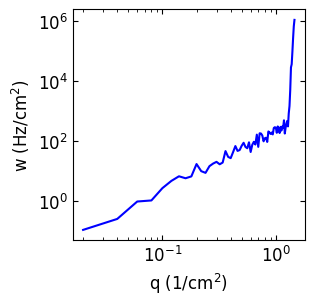

In [27]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
# plt.plot(q_lst,w_lst,color='k')
plt.plot(dout['q'].values,dout['w'].values,color='b')
plt.xscale('log')
plt.yscale('log')
# plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

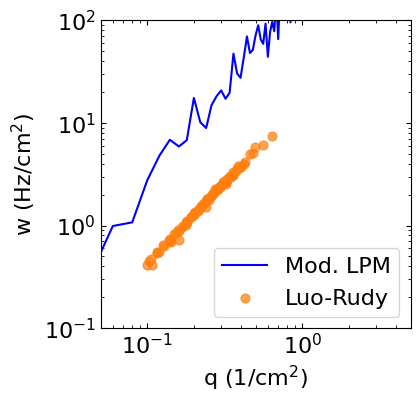

In [28]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
# x2lim=[0.01, 250]
# x2lim=[0.01, 500]
x2lim=[0.01, 800]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim,
                                  show_fk=False,#True,#
                                  alpha=0.7)
ax.get_legend().remove()
ax.plot(dout['q'].values,dout['w'].values,color='b',label='Mod. LPM')
# ax.plot(q_lst,w_lst,color='k',label='LPM')
ax.legend(loc='lower right',fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
# AddLegend(ax=ax)
ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [63]:
# 100	0.000239968	4	166.6888919
# (166.6888919-160.642570)/160
# niter
L

10

In [58]:
niter

500

In [189]:
# save_dir = f"{nb_dir}/data/control_data/modified_lpm_table1_lr_L_5_niter_{niter}.csv"
save_dir = f"{nb_dir}/data/control_data/modified_lpm_table1_lr_L_10_niter_{niter}.csv"
os.path.exists(save_dir)

True

In [190]:
save_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/modified_lpm_table1_lr_L_5_niter_10000.csv'

In [191]:
dout.rename({'CollTime':'Tavg','N':'N0'}).to_csv(save_dir,index=False)

In [92]:
# Q: what should I set Nmax to?
# A: Nmax=150 is a good balance between runtime and trace quality
#TODO: dev run #39

In [93]:
# Q: why don't they perfectly touch?
# A: because the first datum is removed.

# TODO: find a rough fit to FK

In [201]:
# for LR: 
#***# 0.0125 0.42 10 100 9.3 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.005706,0.003073,0.002218,0.001872,0.001550,0.001404,0.001244,0.001190,0.001119,0.001026,0.000976,0.000962,0.000942,0.000934,0.000868,0.000865,0.000831,0.000800,0.000813,0.000814,0.000788,0.000799,0.000782,0.000853,0.000859,0.000795,0.000839,0.000828,0.000888,0.000861,0.000881,0.000883,0.000884,0.000940,0.000970,0.001003,0.001061,0.001049,0.001046,0.001165,0.001172,0.001180,0.001164,0.001231,0.001307,0.001371,0.001383,0.001475,0.001544,0.001627,0.001747,0.001836,0.001926,0.002053,0.002200,0.002237,0.002434,0.002724,0.002953,0.003178,0.003590,0.004118,0.004288,0.004855,0.005920,0.006561,0.007902,0.009456,0.012053,0.014999,0.021998,0.034360,0.060003,0.145615,0.665230,
# for FK:
#***# ??

In [ ]:
# heretim

In [213]:
niter=1500
dt=1e-3
dt=1e-4
# 0.155 0.42 5 300 9.3 1 0.001 0.001 150 1500 1 0 0 0 0 0 2
# 0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2 #<<< WJ says this worked well
# dt=1e-5
L=5
# L=10 
# D=0.42#0.4158
# alinear=9.3#9.3154
D = 0.115
alinear = 1.552
neighbor=0

# r=0.135;kappa=100 #too fast
# r=0.0135;kappa=100 #too fast
r=0.0135;kappa=10 #not bad

# kappa=100; r=0.125 #<<< WJ says this worked well for LR
# kappa=50; r=0.125 # still too fast
# kappa=10; r=0.125 # still too fast
# kappa=100; r=0.125 #<<< WJ says this worked well for LR
# kappa=100; r=0.06 # too fast
# kappa=100; r=0.05 # too fast
# kappa=100; r=0.035#too fast
# kappa=100; r=0.025 # # too fast
# # kappa=100; r=0.02 # 
# kappa=100; r=0.015 # too fast
# kappa=100; r=0.0125 # not bad
# # kappa=100; r=0.01 # too slow
# kappa=100; r=0.0125 # not bad

seed=0  #<<< what wj was using
Nmax=100
Nmax=150
input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {Nmax} {niter} {seed} 0 0 0 0 {neighbor} 2"
call_string = f"{cfolder}/return_CollTimes.x <<< '{input_string}'"
os.system(call_string)
beep(3)

Enter the reaction range (cm): r=0.0135
Enter the diffusion coefficient (cm^2/s): D=0.115
Enter the domain width/height (cm): L=5
Enter the reaction rate (Hz): kappa=10
Enter the spring rate (Hz): varkappa=1.552
Enter the unpreferred distance (cm): x0=1
Enter the timestep of motion: Dt=0.0001
Enter the timestep of reaction: dt=0.0001
Enter the number of tips to observe: N=150
Enter the number of trials: niter=1500
Enter the randomization seed: seed=0
Use reflecting boundary conditions? (Enter 1/0): reflect=0
Set second particle within reaction range of first? (Enter 1/0): set_second=0
Do not allow repulsive forces? (Enter 1/0): no_repulsion=0
Do not allow attractive forces? (Enter 1/0): no_attraction=0
Only allow nearest neighbor forces? (Enter 1/0): neighbor=0
Which force model should be used?
(Enter 1:spring, 2:QED2, 3:QED3, 4:QED2 + const. repulsion, 5:QED3 + const. repulsion, else:no force): force_code=2
the repeatable inputs are:
0.0135 0.115 5 10 1.552 1 0.0001 0.0001 150 1500 0 

0

In [214]:
dout = pd.DataFrame({'N':[
150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
],
              'CollTime':[
#modified lpm, unshifted, fitted
# 0.0135 0.115 5 10 1.552 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
0.009762,0.004746,0.003491,0.002804,0.002346,0.001997,0.001988,0.001747,0.001637,0.001574,0.001460,0.001381,0.001289,0.001252,0.001277,0.001223,0.001237,0.001244,0.001190,0.001242,0.001217,0.001167,0.001211,0.001197,0.001232,0.001240,0.001259,0.001276,0.001278,0.001368,0.001361,0.001330,0.001349,0.001467,0.001491,0.001497,0.001514,0.001646,0.001614,0.001725,0.001781,0.001830,0.001851,0.001928,0.001972,0.002087,0.002171,0.002338,0.002488,0.002541,0.002835,0.002795,0.003005,0.003098,0.003453,0.003700,0.003949,0.004193,0.004667,0.004918,0.005556,0.006215,0.007183,0.008124,0.009280,0.010898,0.012691,0.015998,0.020116,0.025679,0.037417,0.061241,0.111674,0.283524,1.473473,
# # 0.0135 0.115 5 100 1.552 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.003116,0.001712,0.001370,0.001190,0.001027,0.000945,0.000903,0.000811,0.000794,0.000801,0.000737,0.000716,0.000739,0.000690,0.000677,0.000680,0.000647,0.000687,0.000670,0.000658,0.000686,0.000659,0.000668,0.000689,0.000668,0.000670,0.000688,0.000700,0.000729,0.000724,0.000707,0.000753,0.000720,0.000784,0.000778,0.000804,0.000809,0.000848,0.000859,0.000838,0.000881,0.000950,0.000988,0.000997,0.001028,0.001068,0.001121,0.001197,0.001251,0.001343,0.001408,0.001472,0.001553,0.001700,0.001861,0.001955,0.002007,0.002330,0.002612,0.002635,0.003034,0.003241,0.003890,0.004311,0.005283,0.005731,0.007304,0.008691,0.011546,0.014522,0.021390,0.031810,0.058499,0.127206,0.539637,
# # 0.135 0.115 5 100 1.552 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.000439,0.000356,0.000342,0.000326,0.000323,0.000329,0.000310,0.000318,0.000325,0.000314,0.000321,0.000330,0.000326,0.000322,0.000321,0.000343,0.000321,0.000341,0.000345,0.000352,0.000368,0.000366,0.000378,0.000399,0.000374,0.000384,0.000408,0.000417,0.000430,0.000454,0.000468,0.000473,0.000491,0.000510,0.000547,0.000531,0.000577,0.000596,0.000634,0.000615,0.000679,0.000726,0.000722,0.000769,0.000815,0.000883,0.000948,0.000938,0.001027,0.001061,0.001160,0.001316,0.001372,0.001486,0.001630,0.001728,0.001943,0.002123,0.002353,0.002547,0.003113,0.003338,0.004001,0.004549,0.005573,0.006447,0.007984,0.009792,0.012272,0.016992,0.025384,0.039550,0.071623,0.171728,0.651588,
# # 0.135 0.115 10 100 1.552 1 0.0001 0.0001 150 1500 0 0 0 0 0 0 2
# 0.001351,0.001193,0.001033,0.001011,0.000969,0.000953,0.000944,0.000864,0.000943,0.000889,0.000884,0.000927,0.000925,0.000926,0.000955,0.001011,0.000977,0.000984,0.001034,0.001033,0.001086,0.001105,0.001085,0.001144,0.001205,0.001264,0.001242,0.001283,0.001370,0.001396,0.001421,0.001489,0.001559,0.001604,0.001733,0.001723,0.001788,0.001982,0.001954,0.002134,0.002235,0.002300,0.002654,0.002709,0.002733,0.002860,0.003178,0.003575,0.003411,0.004033,0.004147,0.004578,0.004937,0.005765,0.005914,0.006678,0.007462,0.007863,0.008399,0.010243,0.011140,0.013431,0.014291,0.017765,0.021046,0.025561,0.033028,0.039249,0.052784,0.074038,0.103912,0.160237,0.289107,0.662736,2.760909,
              ]})
dout['q']=(dout['N']/L**2)
dout['w']=1/(dout['CollTime']*L**2)

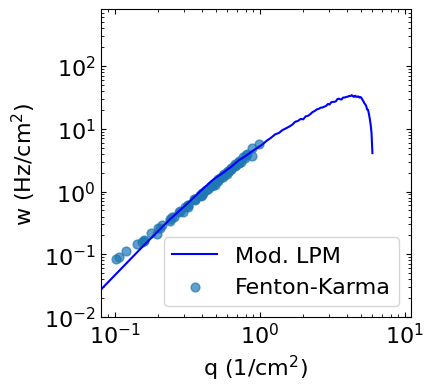

In [215]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
# x2lim=[0.01, 250]
# x2lim=[0.01, 500]
x2lim=[0.01, 800]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim,
                                  show_lr=False,show_fk=True,
                                  alpha=0.7)
ax.get_legend().remove()
ax.plot(dout['q'].values,dout['w'].values,color='b',label='Mod. LPM')
# ax.plot(q_lst,w_lst,color='k',label='LPM')
ax.legend(loc='lower right',fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
# AddLegend(ax=ax)
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

# comparing my vs. WJ's random number generators
first, assume all uniform distribution generators work fine.  Then, our normal r.v. appear to match.

In [120]:
# @njit
def normalRandom(): 
    """normalRandom returns a normally distributed random value"""
    v1=np.random.uniform()
    v2=np.random.uniform()
    return np.cos(2.*3.141592653589793*v2)*np.sqrt(-2.*np.log(v1));


In [121]:
# @njit
def gasdev():
    R=1.2
    while R>=1:
        V1=2*np.random.uniform()-1
        V2=2*np.random.uniform()-1
        R=V1**2+V2**2  
    FAC=np.sqrt(-2.*np.log(R)/R)
    GSET=V1*FAC
    GASDEV=V2*FAC
    return GASDEV,GSET,FAC

In [152]:
# GASDEV,GSET,FAC = gasdev()
# ran=normalRandom()


In [163]:
np.random.seed(42)
niter=1000000
X = np.array([[normalRandom(),*gasdev()] for i in range(niter)]).T
X.shape

(4, 1000000)

True

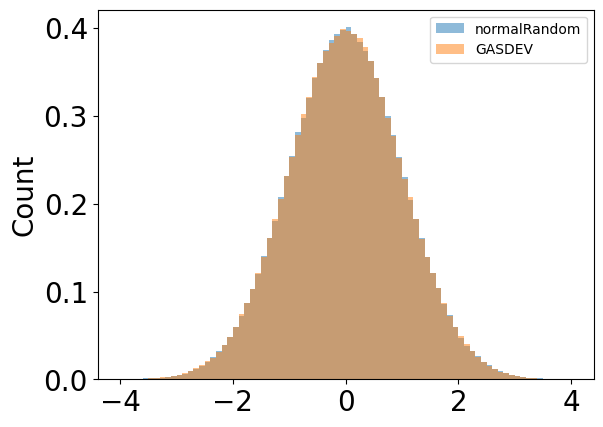

In [164]:
alpha=0.5
density=True
# bins=np.arange(-1,1.05,0.05)
bins=np.arange(-4,4.05,0.1)
plt.hist(X[0],bins=bins,label='normalRandom',alpha=alpha,density=density)
plt.hist(X[1],bins=bins,label='GASDEV',alpha=alpha,density=density)
# plt.hist(X[2],bins=bins,label='GSET',alpha=alpha,density=density)
# plt.hist(X[3],bins=bins,label='FAC',alpha=alpha,density=density)
plt.legend()
format_plot(xlabel='',ylabel='Count',)

In [143]:
# np.concatenate([np.array([tuple(normalRandom(),*gasdev()) for i in range(niter)]),
#      np.array([normalRandom() for i in range(niter)])])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [140]:
# np.random.seed(42)
# niter=1000
# X = np.stack(
#     [np.array([gasdev() for i in range(niter)]).T,
#      np.array([normalRandom() for i in range(niter)])])
# X.shape

ValueError: all input arrays must have the same shape

In [ ]:
# Q: how does my normalRandom() compare to WJ's gasdev function?
# Q: does WJ's gasdev function give the classical normal distribution?